## Experiment Analysis
 ---

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#twostages = pd.read_csv('../../crowdED/data/20181024_20:26-stg2simulations.csv')
twostages = pd.read_csv('../../crowdED/data/20181024_06:21-stg2simulations.csv')
onestage = pd.read_csv('../../crowdED/data/20181024_03:31-stg1simulations.csv')

In [3]:
len(twostages)

145152

In [4]:
#twostages = twostages.loc[:, twostages.columns != 'proportion_hard_tasks']

In [5]:
print('Number of simulations {}\nFailed simulations {}%'.format(
    len(twostages),round(len(twostages[twostages['accuracy'] == 0]) *100/ len(twostages)),2))

Number of simulations 145152
Failed simulations 16%


In [6]:
print('Number of simulations {}\nFailed simulations {}%'.format(
    len(onestage),round(len(onestage[onestage['accuracy'] == 0]) *100/ len(twostages)),2))

Number of simulations 145152
Failed simulations 0%


In [7]:
twostages['ratio_worker_task'] = twostages['total_workers'] / twostages['total_tasks']
twostages['ratio_wpt_workers'] = twostages['workers_per_task'] / twostages['total_workers']
twostages['ratio_keys_workers'] = twostages['total_keys'] / twostages['total_workers']

In [113]:
onestage['ratio_worker_task'] = onestage['total_workers'] / onestage['total_tasks']
onestage['ratio_wpt_workers'] = onestage['workers_per_task'] / onestage['total_workers']
onestage['ratio_keys_workers'] = onestage['total_keys'] / onestage['total_workers']

## When do the experiment fails?

In [8]:
df_failed = twostages[twostages['accuracy'] == 0]

In [9]:
#g = sns.PairGrid(df_failed)
#g.map_diag(sns.kdeplot)
#g.map_offdiag(sns.kdeplot)

What failed experiments dataset tells:
    - A few number of workers is not good (20 workers fails)
    - Many workers per task is not good (more than 9 fails)
    - Proportion of traning set, number of tasks and number of keys are not relevant for the not succesful experiments

Now trying with metrics

In [10]:
df_failed_filtered = df_failed[['ratio_worker_task','ratio_wpt_workers','ratio_keys_workers','proportion_train_tasks']]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


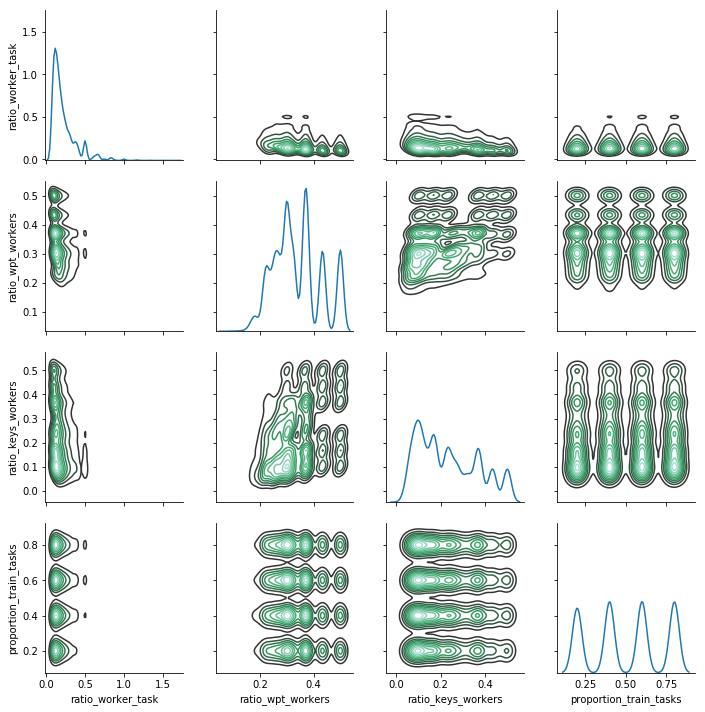

In [11]:
g = sns.PairGrid(df_failed_filtered)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)

- Fails when the ratio worker tasks is 10%, so is needed more than 10% workers of the total of tasks to be done
- There is a particular failing around .2 ratio-wpt-workers and .2 ratio-keys-workers, one failure example would be 25 workers, 5 wpt and 5 keys
- The ratio workers per task when gets higher start to fail

## Accuracy one stage vs two stages

In [12]:
import scipy.stats as stats

In [119]:
df_two = twostages[twostages['accuracy'] != 0]
df_one = onestage.loc[[j for j in set(onestage.index)-set(df_failed.index)]]

In [14]:
#mapping the working dataset
#df_two.to_csv('../crowdedsimulations.csv')

In [15]:
print('Average Accuracy \n One Stage: {} (SD {}) \n Two Stages: {} (SD {})'.format(
    round(df_one['accuracy'].mean(),3), round(df_one['accuracy'].std(),3), 
    round(df_two['accuracy'].mean(),3), round(df_two['accuracy'].std(),3)))

Average Accuracy 
 One Stage: 0.922 (SD 0.043) 
 Two Stages: 0.954 (SD 0.031)


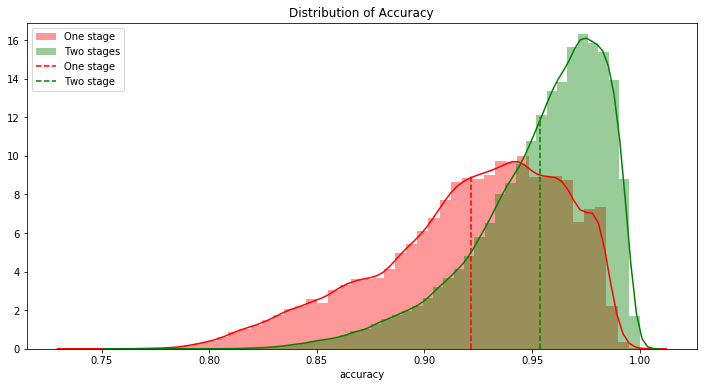

In [16]:
plt.figure(figsize=[12, 6])
sns.distplot(df_one['accuracy'], color='r', label='One stage')
sns.distplot(df_two['accuracy'], color='g', label='Two stages')
plt.vlines(x=df_one['accuracy'].mean(),ymin=0,ymax=9, color='r', linestyles='--', label='One stage')
plt.vlines(x=df_two['accuracy'].mean(),ymin=0,ymax=12, color='g', linestyles='--', label='Two stage')
plt.title('Distribution of Accuracy')
plt.legend()
plt.savefig('../accuracy_distribution.png')

Statistical difference

In [17]:
stats.ttest_rel(df_one['accuracy'],df_two['accuracy'])

Ttest_relResult(statistic=-436.26745612483825, pvalue=0.0)

Method with a training performs better

## The best scenarios in a 2 stage experiment

In [136]:
q = .8 #highest quantile to filter the best accuracy group (the best 20%)
#top_scenarios = df_two[df_two['accuracy'] >= df_two.quantile(q)['accuracy']]
top_scenarios = df_one[df_one['accuracy'] >= df_one.quantile(q)['accuracy']]

In [137]:
top = top_scenarios[top_scenarios['cross_entropy'] <= top_scenarios.quantile(.2)['cross_entropy']]

In [138]:
top1 = top_scenarios[top_scenarios['proportion_hard_tasks']==0].sort_values('accuracy', ascending = False)

In [145]:
#top2 = top1[(top1['total_keys']==3) & (top1['proportion_train_tasks']==0.2)].sort_values('cross_entropy')
top2 = top1[(top1['total_keys']==3)].sort_values('cross_entropy')

In [146]:
top3 = top2[['total_tasks','total_workers','workers_per_task','accuracy','cross_entropy','ratio_worker_task','ratio_wpt_workers']]

In [153]:
#top3.describe()

In [154]:
#top4 = top3[top3['workers_per_task']==3][['total_tasks','total_workers','ratio_worker_task','ratio_wpt_workers','accuracy']]
top4 = top3[top3['workers_per_task']==3][['total_tasks','total_workers','ratio_worker_task','ratio_wpt_workers','accuracy']]

In [155]:
top4.describe()

,total_tasks,total_workers,ratio_worker_task,ratio_wpt_workers,accuracy
count,20.000000,20.000000,20.000000,20.000000,20.00000
mean,144.000000,63.500000,0.651919,0.054018,0.96483
std,99.599197,23.232237,0.434959,0.020333,0.00556
min,60.000000,30.000000,0.111111,0.030000,0.96040
25%,60.000000,40.000000,0.325000,0.036458,0.96110
50%,110.000000,55.000000,0.527778,0.055000,0.96250
75%,185.000000,82.500000,0.833333,0.075000,0.96670
max,380.000000,100.000000,1.500000,0.100000,0.98330


In [157]:
#top5 = top4[top4['ratio_wpt_workers'] >=.1].sort_values('ratio_wpt_workers',ascending=False)

In [158]:
#top5.describe()

In [159]:
#top5.sort_values('total_tasks',ascending=False)
top4.sort_values('total_tasks',ascending=False)

,total_tasks,total_workers,ratio_worker_task,ratio_wpt_workers,accuracy
131124,380,50,0.131579,0.060000,0.9614
121968,360,40,0.111111,0.075000,0.9620
81648,260,40,0.153846,0.075000,0.9641
71694,220,100,0.454545,0.030000,0.9697
59598,200,60,0.300000,0.050000,0.9617
55524,180,100,0.555556,0.030000,0.9611
49434,180,40,0.222222,0.075000,0.9630
45444,160,80,0.500000,0.037500,0.9604
38304,140,90,0.642857,0.033333,0.9643
25326,120,40,0.333333,0.075000,0.9611


In [148]:
top_scenarios = top3

In [149]:
len(top_scenarios)/len(df_two)

0.0002938679553320708

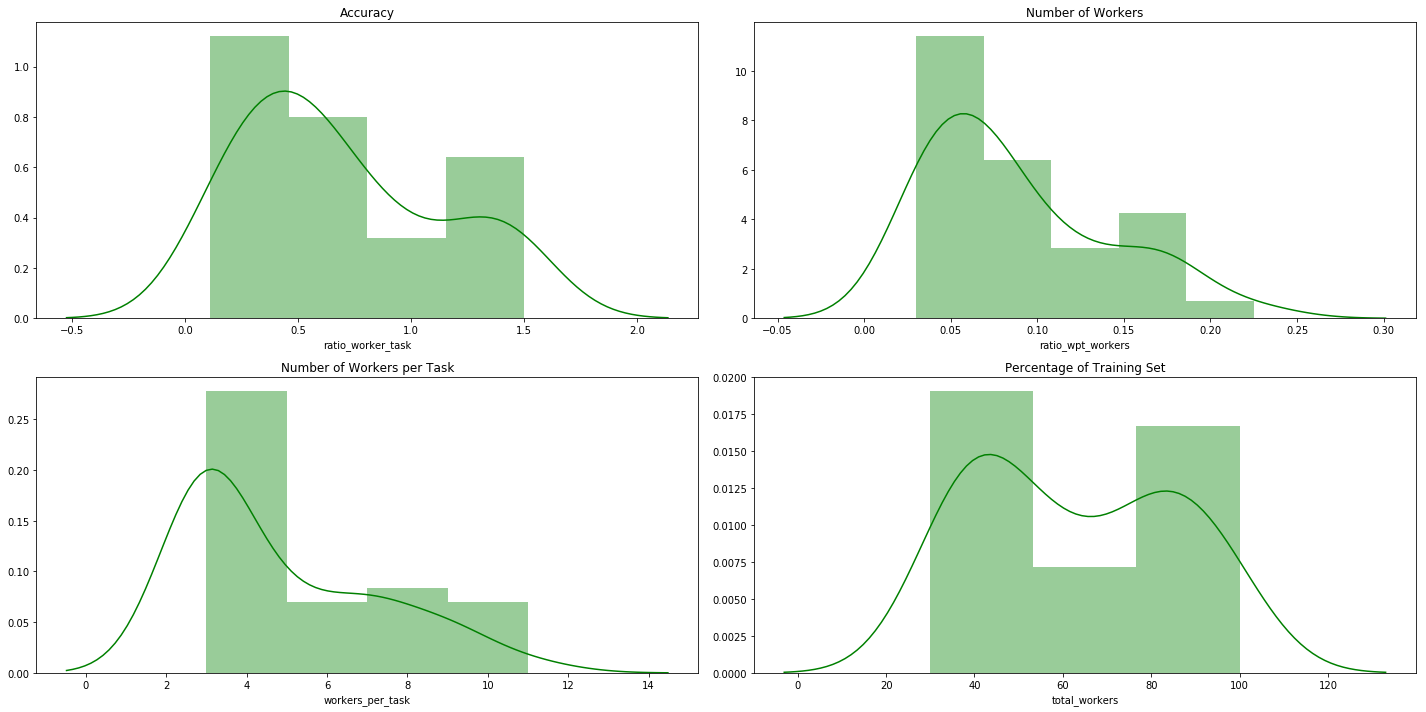

In [151]:
plt.figure(figsize=[20, 10])
plt.subplot(2,2,1)
sns.distplot(top_scenarios['ratio_worker_task'], color="g")
plt.title('Accuracy')
plt.subplot(2,2,2)
sns.distplot(top_scenarios['ratio_wpt_workers'], color="g")
plt.title('Number of Workers')
plt.subplot(2,2,3)
sns.distplot(top_scenarios['workers_per_task'], color="g")
plt.title('Number of Workers per Task')
plt.subplot(2,2,4)
sns.distplot(top_scenarios['total_workers'], color="g")
plt.title('Percentage of Training Set')
plt.tight_layout()
#plt.savefig('../top_scenarios.png')

In [22]:
top_scenarios.head()

,total_tasks,total_workers,proportion_hard_tasks,proportion_train_tasks,workers_per_task,total_keys,accuracy,cross_entropy,f1,ratio_worker_task,ratio_wpt_workers,ratio_keys_workers
2,60,30,0.0,0.2,3,7,0.9889,2.7567,0.9880,0.5,0.100000,0.233333
3,60,30,0.0,0.2,3,11,0.9944,3.3224,0.9908,0.5,0.100000,0.366667
4,60,30,0.0,0.2,3,13,0.9833,3.5317,0.9769,0.5,0.100000,0.433333
5,60,30,0.0,0.2,3,15,0.9889,3.8144,0.9901,0.5,0.100000,0.500000
6,60,30,0.0,0.2,5,3,0.9833,1.5803,0.9832,0.5,0.166667,0.100000


In [23]:
#sorted(top_scenarios['ratio_worker_task'].unique())

In [24]:
cheap_scenarios = top_scenarios[top_scenarios['ratio_worker_task']<=.2]

In [25]:
#how many of this group
len(cheap_scenarios)

6010

In [26]:
#accuracy this group
cheap_scenarios['accuracy'].mean() #1 stage

0.9870455906821854

In [27]:
cheap_scenarios.columns

Index(['total_tasks', 'total_workers', 'proportion_hard_tasks',
       'proportion_train_tasks', 'workers_per_task', 'total_keys', 'accuracy',
       'cross_entropy', 'f1', 'ratio_worker_task', 'ratio_wpt_workers',
       'ratio_keys_workers'],
      dtype='object')

In [28]:
cheap_scenarios_filtered = cheap_scenarios[['accuracy','proportion_train_tasks','ratio_wpt_workers','ratio_keys_workers','cross_entropy']]#,'ratio_worker_task']]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


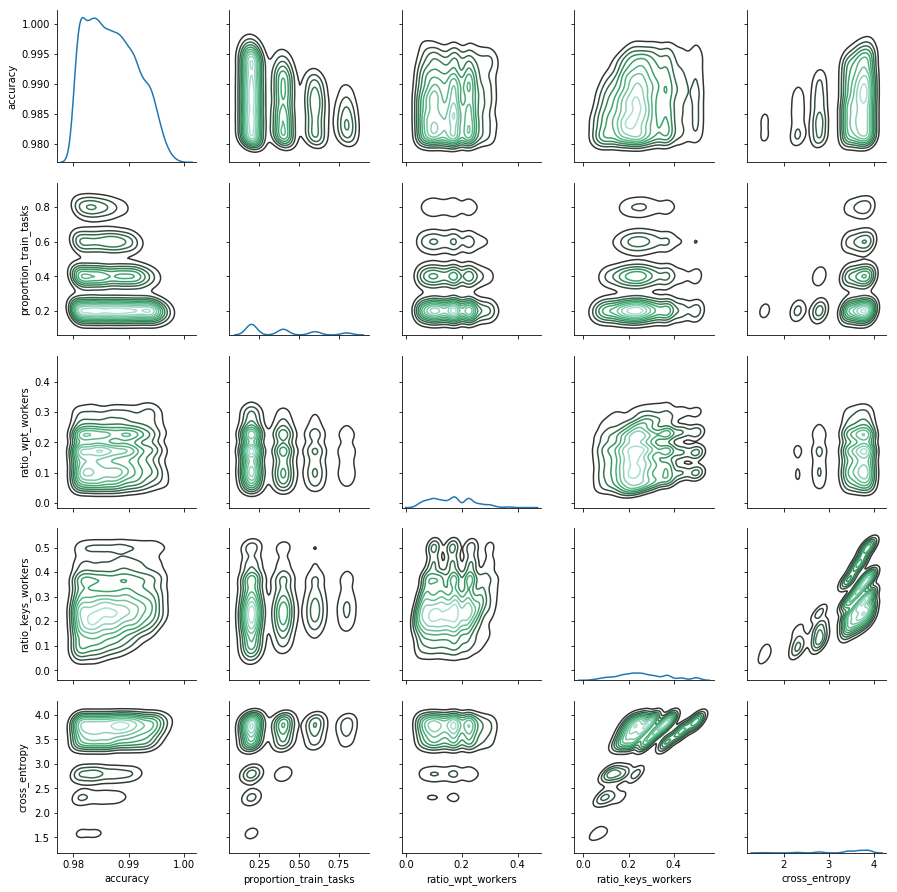

In [29]:
g = sns.PairGrid(cheap_scenarios_filtered)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)

- The accuracy declains when we pick up more tasks to train (it happens the same with cross entropy)
- The accuracy is great when the ratio wpt-workers is between 10% and 20% if you have 50 workers then between 5 and 9 wpt (the same with corss entropy)
- Cross entropy has a positive correlation with ratio key-workers

Find the optimal to recomend

In [30]:
df = cheap_scenarios_filtered
trace1 = go.Scatter3d(
    z=df['accuracy'].values,
    y=df['ratio_keys_workers'].values,#df['ratio_worker_task'].values,
    x=df['ratio_wpt_workers'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=min(df['proportion_train_tasks'].values),
        size=df['proportion_train_tasks'].values*5,#6,
        color=df['cross_entropy'].values,#sub['accuracy'].values,#                # set color to an array/list of desired values
        colorscale='Bluered',   # choose a colorscale
        colorbar = dict(title = 'Cross<br>Entropy'),
        opacity=0.4
    )
)

In [31]:
data = [trace1]
layout = go.Layout(height=1000, width=1000, title='CrowdED Accuracy',
                  scene = dict(xaxis=dict(title='Workers per Task Rate'),
                               yaxis=dict(title='Options Rate'),
                               zaxis=dict(title='Accuracy')))

In [32]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

- ratio of keys and wpt debe should be low, around 20% to get crossentropy close to cero
- the proportion of workers among the total of tasks should be less than 20%
- the percentage set to train should be less than 30%